# Assignment 3

## Part 1 Questions
1. What is the advantage of using the Apriori algorithm in comparison with computing the support of every subset of an itemset in order to find the frequent itemsets in a transaction dataset?
2. Let $\mathcal{L}_1$ denote the set of frequent $1$-itemsets. For $k \geq 2$, why must every frequent $k$-itemset be a superset of an itemset in $\mathcal{L}_1$?
3. Let $\mathcal{L}_2 = \{ \{1,2\}, \{1,4\}, \{2, 3\}, \{2, 4\}, \{3, 5\}\}$. Compute the set of candidates $\mathcal{C}_3$ that is obtained by joining every pair of joinable itemsets from $\mathcal{L}_2$.
4. Let $S_1$ denote the support of the association rule $\{ \text{boarding pass, passport} \} \Rightarrow \{ \text{flight} \}$. Let $S_2$ denote the support of the association rule $\{ \text{boarding pass} \} \Rightarrow \{ \text{flight} \}$. What is the relationship between $S_1$ and $S_2$?
5. What is the support of the rule $\{  \} \Rightarrow \{ \text{Eggs} \}$ in the transaction dataset used in Section 1 of this lab notebook?
6. In the transaction dataset used in the tutorial presented above, what is the maximum length of a frequent itemset for a support threshold of 0.2?
7. Implement a function that computes the Kulczynski measure of two itemsets $\mathcal{A}$ and $\mathcal{B}$. Use your function to compute the Kulczynski measure for itemsets $\mathcal{A} = \{\text{Onion}\}$ and $\mathcal{B} = \{\text{Kidney Beans}, \text{Eggs}\}$ in the transaction dataset used in this lab notebook.
8. Implement a function that computes the imbalance ratio of two itemsets $\mathcal{A}$ and $\mathcal{B}$. Use your function to compute the imbalance ratio for itemsets $\mathcal{A} = \{\text{Onion}\}$ and $\mathcal{B} = \{\text{Kidney Beans}, \text{Eggs}\}$ in the transaction dataset used in this lab notebook.

### Question 1

The advantage of the Apriori algorithm is the Apriori property - we know that all nonempty subsets of a frequent itemset must also be frequent. It uses prior knowledge to search level-wise, where $k$-itemsets are used to explore $(k+1)$ itemsets, which is advantageous in order to reduce the search space. For example, initially all the 1-itemsets that satisfy the minimum support are collected, followed by the 2-itemsets and so on.

Therefore, any itemset that does not satisfy the minimum support threshold will have supersets that do not meet this requirement. This property is also known as antimonotonicity, and is implemented in the pruning stage of the Apriori algorithm where subsets that are not frequent are removed.

### Question 2


According to the Apriori property,  we know that all nonempty subsets of a frequent itemset must also be frequent. If $\mathcal{L}_1$ contains all the frequent 1-itemsets, i.e. they all satisfy the minimum support threshold, then all the frequent $k$-itemsets must be supersets of these 1-itemsets. As mentioned earlier, $k$-itemsets are used to explore $(k+1)$ itemsets. In other words, any transaction containing a frequent item superset must also contain the items in the subset of $\mathcal{L}_1$.

### Question 3

$\mathcal{C}_3 = \{ \{1,2,4\}, \{2,3,4\}\}$ in ascending order

### Question 4

The support of an association rule is essentially the probability that a transaction in a dataset contains the all the itemsets in the association rule.

The support of the association rule $S_1 = \{ \text{boarding pass, passport} \} \Rightarrow \{ \text{flight} \}$ is equal to the support of the itemset:  $\text {boarding pass} \cup \text {passport} \cup \text {flight}$

The support of the association rule $S_2 = \{ \text{boarding pass} \} \Rightarrow \{ \text{flight} \}$ is equal to the support of the itemset:  $ \text {boarding pass} \cup \text {flight}$

Since $S_2$ is effectively a subset of $S_1$ (and $S_1$ is a superset of $S_2$) , then we know that $S_1$ can never be more frequent than $S_2$

### Question 5

The support of $\{  \} \Rightarrow \{ \text{Eggs} \}$ is the same as $P(\text{Eggs})$ which is 4 (transactions that contain eggs) out of 5 (total transactions) that contain eggs, or 0.8.

### Question 6

We can see that there are five transactions in the dataset, therefore each transaction has a support of 1/5 = 0.2 and would satisfy the minimum support threshold. The greatest number of items in a transaction out of these five transactions is 6, which is a frequent itemset with support threshold 0.2. Furthermore, based on the Apriori algorithm, we know that all of the nonempty subsets must also be frequent. Therefore, the maximal length of a frequent itemset is 6, for a support threshold of 0.2.

### Question 7

In [1]:
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd
from mlxtend.frequent_patterns import apriori

dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]


# Define a function which accepts (itemsets) A, B and the transaction dataset 
# as parameters, and determines the Kulczynski measure
def kulczynski_measure(A, B, dataset):
    
    te = TransactionEncoder()
    te_ary = te.fit_transform(dataset)
    df = pd.DataFrame(te_ary, columns=te.columns_)

    # Generate the frequent itemsets
    frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True)
    
    # Creating a dictionary to map the frequent itemset 
    # (represented by a frozen set) to the support
    support = {}
    for _, row in frequent_itemsets.iterrows():
        support[row['itemsets']] = row['support']
    
    # Determine the support of the frozensets using the support dictionary
    support_A = support[frozenset(A)]
    support_B = support[frozenset(B)]
    support_A_union_B = support[frozenset(A + B)]
    
    # Determine the two confidences
    a_given_b = (support_A_union_B) / support_B
    b_given_a = (support_A_union_B) / support_A
    
    # Compute the Kulczynski measure
    return (a_given_b + b_given_a) / 2


# Compute the Kulczynski measure for the itemsets
kulczynski = kulczynski_measure(['Onion'], ['Kidney Beans', 'Eggs'], dataset)
print("The Kulczynski measure for itemsets A and B is: ", kulczynski)

The Kulczynski measure for itemsets A and B is:  0.875


### Question 8

In [2]:
# Define a function which accepts lists (itemsets) A, B and the transactions data 
# as parameters, and determines the imbalance ratio
def imbalance_ratio(A, B, dataset):
    
    te = TransactionEncoder()
    te_ary = te.fit_transform(dataset)
    df = pd.DataFrame(te_ary, columns=te.columns_)
    
    # Generate the frequent itemsets
    frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True)
    
    # Creating a dictionary to map the frequent itemset 
    # (represented by a frozen set) to the support
    support = {}
    for _, row in frequent_itemsets.iterrows():
        support[row['itemsets']] = row['support']
    
    # Determine the support of the frozensets using the support dictionary
    support_A = support[frozenset(A)]
    support_B = support[frozenset(B)]
    support_A_union_B = support[frozenset(A + B)]
    
    # Calculate the absolute difference between support of A and B
    absolute_difference = abs(support_A - support_B)
    
    # Calculate the number of transactions containing A or B
    transactions_A_or_B = support_A + support_B - support_A_union_B
    
    # Compute the imbalance ratio
    return absolute_difference / transactions_A_or_B

# Compute the Imbalance ratio for the itemsets
imbalance_ratio = imbalance_ratio(['Onion'], ['Kidney Beans', 'Eggs'], dataset)
print("The imbalance ratio for itemsets A and B is: ", imbalance_ratio)

The imbalance ratio for itemsets A and B is:  0.2500000000000001


## Part 2 Questions

1. For an application on credit card fraud detection, we are interested in detecting contextual outliers. Suggest 2 possible contextual attributes and 2 possible behavioural attributes that could be used for this application, and explain why each of your suggested attribute should be considered as either contextual or behavioural.

2. Assume that you are provided with the [University of Wisconsin breast cancer dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data) from the Week 3 lab, and that you are asked to detect outliers from this dataset. Additional information on the dataset attributes can be found [online](https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.names). Explain one possible outlier detection method that you could apply for detecting outliers for this particular dataset, explain what is defined as an outlier for your suggested approach given this particular dataset, and justify why would you choose this particular method for outlier detection.

3. The monthly rainfall in the London borough of Tower Hamlets in 2019 had the following amount of precipitation (measured in mm, values from January-December 2018): {22.93, 20.69, 25.75, 23.84, 25.34, 3.25, 23.55, 28.28, 23.72, 22.42, 26.83, 23.82}. Assuming that the data is based on a normal distribution, identify outlier values in the above dataset using the maximum likelihood method.

4. Using the stock prices dataset used in sections 1 and 2 of this lab notebook, estimate the outliers in the dataset using the one-class SVM classifier approach. As input to the classifier, use the percentage of changes in the daily closing price of each stock, as was done in section 1 of the notebook. Plot a 3D scatterplot of the dataset, where each object is color-coded according to whether it is an outlier or an inlier. Also compute a histogram and the frequencies of the estimated outlier and inlier labels. In terms of the plotted results, how does the one-class SVM approach for outlier detection differ from the parametric and proximity-based methods used in the lab notebook? What percentage of the dataset objects are classified as outliers?

5. This question will combine concepts from both data preprocessing and outlier detection. Using the house prices dataset from Section 3 of this lab notebook, perform dimensionality reduction on the dataset using PCA with 2 principal components (make sure that the dataset is z-score normalised beforehand, and remember that PCA should only be applied on the input attributes). Then, perform outlier detection on the pre-processed dataset using the k-nearest neighbours approach using k=2. Display a scatterplot of the two principal components, where each object is colour-coded according to the computed outlier score.

### Question 1

For an application on credit card fraud detection:
* Two possible contextual attributes could be income level and credit limit.
* Two possible behavioural attributes could be expenditure patterns and credit limit usage.

Contextual attributes provide context, whereas behavioural attributes are used to evaluate whether an object is an outlier based on this context. 

Using the examples above, if a user has expenditure patterns (behaviour) similar to that of a millionaire, but their income level is low (context), we could define this as an  outlier.  Whereas, a customer with a higher income level would be expected to behave in this way. Without context, the low income user may not be detected as an outlier.

Another example would be to consider all users who use most of their credit limit. If a user with a low credit limit (context) were to have a high percentage of credit limit usage (behaviour), this would not be considered an outlier. Whereas, a user with a high credit limit and high usage could be considered an outlier if their balance is greater than their limit. This information could be useful to a business in order to generate revenue by raising limits for such outliers.

### Question 2

The breast cancer dataset consists of several attributes and two classes 2 and 4 (which correspond to benign and malignant respectively). The malignant cases would be deemed as outliers, whereas the benign would be inliers (since having malignancy is rare). As such, the training set would consist of "normal" benign cases and "outlier" malignant cases. Approximately 65.5% of the dataset comprises of benign cases which is the majority class, so malignant cases would be outliers. Furthermore we could remove some malignant examples, to reflect the unbalanced distribution of few outliers in practical applications.

Therefore, we could build a model to detect the outliers by establishing the decision boundary of the normal data class. One method to do this is a one-class support vector machine (SVM). As such, an object within the decision boundary would be a benign, and any outside would be malignant. We previously saw that the results of PCA showed two separable clusters of classes, which may indicate the suitability of the one-class SVM approach to detect outliers. 

In addition, if we were to use a "traditional" classification method, since the number of normal samples is much greater than the outlier samples, we could struggle to build an accurate classifier. This is because it would be difficult to represent the outlier samples. Thus, the once-class model can be used to overcome this difficulty which only focuses on the normal class and regards any other objects as being outliers.

### Question 3

Assuming that the data is based on a normal distribution, we can use the maximum-likelihood method to estimate the mean and standard deviation. We know that the $ μ±3σ $ region contains 99.7% of the data, thus any data that is more than 3 standard deviations away from the mean (in any direction) would be an outlier.

In [8]:
monthly_rainfall = [22.93, 20.69, 25.75, 23.84, 25.34, 
                    3.25, 23.55, 28.28, 23.72, 22.42, 26.83, 23.82]

# Compute the mean monthly rainfall
mean_monthly_rainfall = sum(monthly_rainfall) / len(monthly_rainfall)
print("The mean monthly rainfall is: ", mean_monthly_rainfall)

# Compute the variance
variance = sum((i - mean_monthly_rainfall)**2 
               for i in monthly_rainfall) / len(monthly_rainfall)

print("The variance is: ", variance)

# Compute the standard deviation
standard_deviation = variance ** (1/2)
print("The standard deviation is: ", standard_deviation)

# Compute the z-scores
z_scores = []

for i in monthly_rainfall:
    z_score = (i - mean_monthly_rainfall) / standard_deviation
    z_scores.append(z_score)

print("The z-scores are: ", z_scores)
 
# Determine outliers
outliers_list = []    
for z in z_scores:
    if abs(z) >= 3:
        outlier_idx = z_scores.index(z)
        outliers_list.append(monthly_rainfall[outlier_idx])

print("The outlier is: ", outliers_list[0])

The mean monthly rainfall is:  22.535
The variance is:  37.57745833333333
The standard deviation is:  6.130045540885756
The z-scores are:  [0.0644367154151557, -0.3009765568125628, 0.5244659242018374, 0.21288585725766646, 0.4575822449101567, -3.145979890585516, 0.16557788897818515, 0.9371871647090377, 0.19331014624546708, -0.018760056386690663, 0.70064732331163, 0.20962323875563332]
The outlier is:  3.25


### Question 4

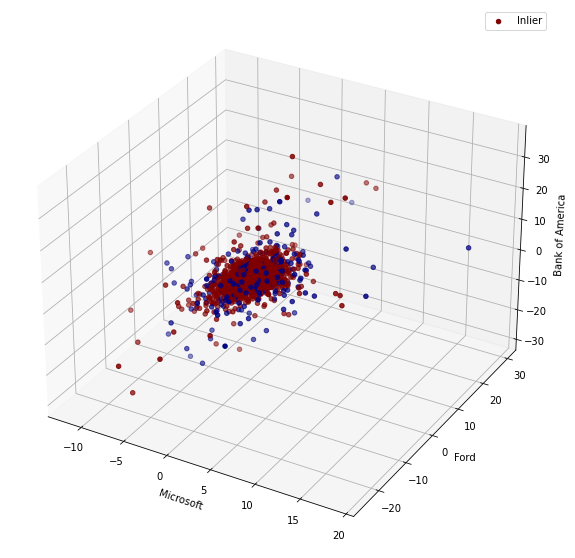

In [9]:
import numpy as np
from sklearn.svm import OneClassSVM
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

stocks = pd.read_csv('stocks.csv', header='infer') 
stocks.index = stocks['Date']
stocks = stocks.drop(['Date'],axis=1)

N,d = stocks.shape
delta = pd.DataFrame(100*np.divide(
    stocks.iloc[1:,:].values-stocks.iloc[:N-1,:].values, 
                                   stocks.iloc[:N-1,:].values),
                    columns=stocks.columns, index=stocks.iloc[1:].index)

X = delta.values

ee = OneClassSVM(nu=0.01, gamma='auto')
yhat = ee.fit_predict(X)

outlier = pd.DataFrame(yhat, index=delta.index, columns=['Outlier'])
result = pd.concat((delta,outlier), axis=1)

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

p = ax.scatter(result['MSFT'],result['F'],
               result['BAC'],c=result['Outlier'],cmap='jet')

ax.set_xlabel('Microsoft')
ax.set_ylabel('Ford')
ax.set_zlabel('Bank of America')
plt.legend(['Inlier'])
plt.show()

Compared to the parametric and proximity-based methods used in the lab notebook, the one-class SVM approach seems to classify a lot more of the points as outliers. It does not follow the general pattern that the further a point is from the centre, the greater the outlier score. The outliers also seem to be mixed with the inliers in terms of their positions, and there seems to be misclassification as some of the inliers may obviously appear to actually be outliers. At first glance, it does not appear to be a great classification of outliers.

The counts of each class are:
  1    2069
-1     448
Name: Outlier, dtype: int64


Text(0.5, 0, 'Outlier (-1) and Inlier (1)')

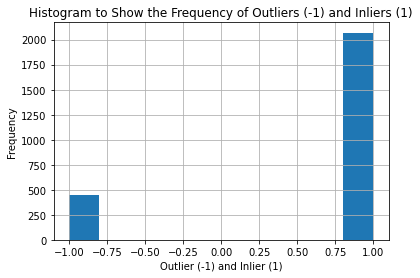

In [5]:
print("The counts of each class are:\n", result.Outlier.value_counts())
result.Outlier.hist()
plt.title("Histogram to Show the Frequency of Outliers (-1) and Inliers (1)")
plt.ylabel("Frequency")
plt.xlabel("Outlier (-1) and Inlier (1)")

In [6]:
number_of_outliers = len(result[result['Outlier']==-1])
total_points = len(result)
percentage_outliers = number_of_outliers / total_points * 100
print("The percentage of dataset objects classified as outliers is (to 2 d.p.): {0:.2f}" .format(percentage_outliers), "%")

The percentage of dataset objects classified as outliers is (to 2 d.p.): 17.80 %


### Question 5

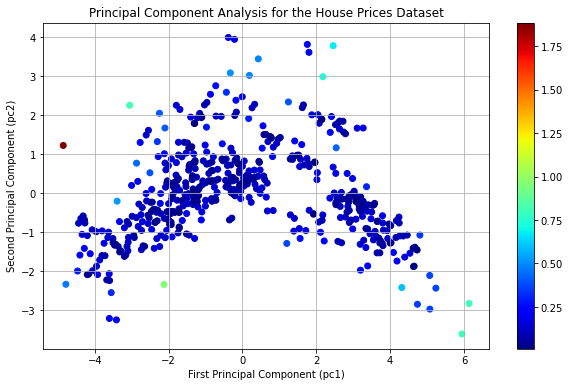

In [7]:
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
import numpy as np
from scipy.spatial import distance
from sklearn.preprocessing import StandardScaler

# Loading the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
df = pd.read_csv(url, header=None)

# Extracting the values from the dataframe
data = df.values

# Split dataset into input and output elements
X, y = data[:, :-1], data[:, -1]

scaler = StandardScaler()
Z = scaler.fit_transform(X)

numComponents = 2
pca = PCA(n_components=numComponents)

projected = pca.fit_transform(Z)

projected = pd.DataFrame(projected,columns=['pc1','pc2'])


# Implement a k-nearest neighbour approach using k=2 neighbours
knn = 2
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean)
nbrs.fit(projected.values)
distances, indices = nbrs.kneighbors(projected.values)

# The outlier score is set as the distance between 
# the point and its k-th nearest neighbour
outlier_score = distances[:,knn-1]


fig = plt.figure(figsize=(10,6))
p = plt.scatter(projected.pc1,projected.pc2,c=outlier_score,cmap='jet')

plt.xlabel("First Principal Component (pc1)")
plt.ylabel("Second Principal Component (pc2)")
plt.title("Principal Component Analysis for the House Prices Dataset")
fig.colorbar(p)
plt.grid()